<a href="https://colab.research.google.com/github/Shuvro-Ahmed/Edge-AI/blob/main/Haberman's_Survival_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
columns = ["age", "year_of_operation", "positive_nodes", "survival_status"]
data = pd.read_csv(url, names=columns)

In [6]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                306 non-null    int64
 1   year_of_operation  306 non-null    int64
 2   positive_nodes     306 non-null    int64
 3   survival_status    306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [7]:
# Display the first few rows of the dataset
data.head()

,age,year_of_operation,positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Observations:

The dataset consists of 4 columns: "age", "year_of_operation", "positive_nodes", and "survival_status".
There are no missing values in the dataset.

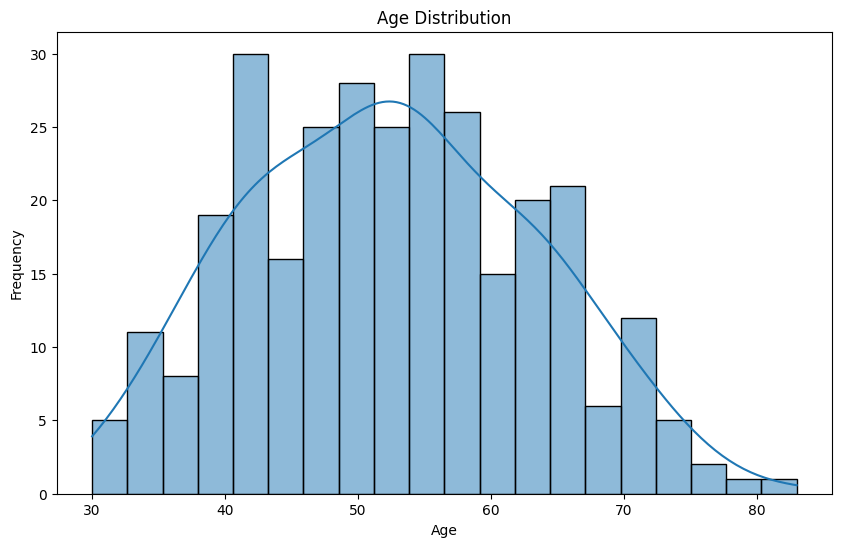

In [8]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Observation:

The age distribution is right-skewed.
Most patients in the dataset are between the ages of 40 and 70.

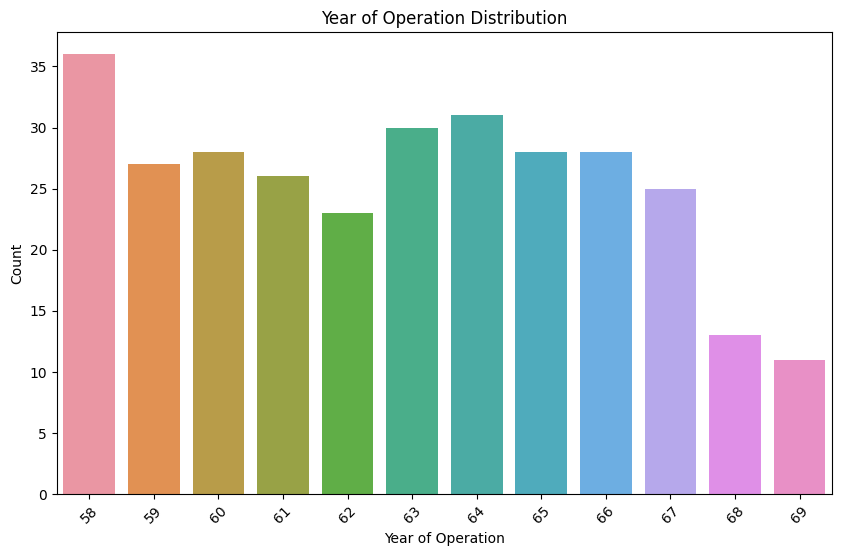

In [9]:
# Year of operation distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="year_of_operation")
plt.title("Year of Operation Distribution")
plt.xlabel("Year of Operation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Observation:

The number of operations seems to have decreased over the years, with a noticeable drop after 1965.

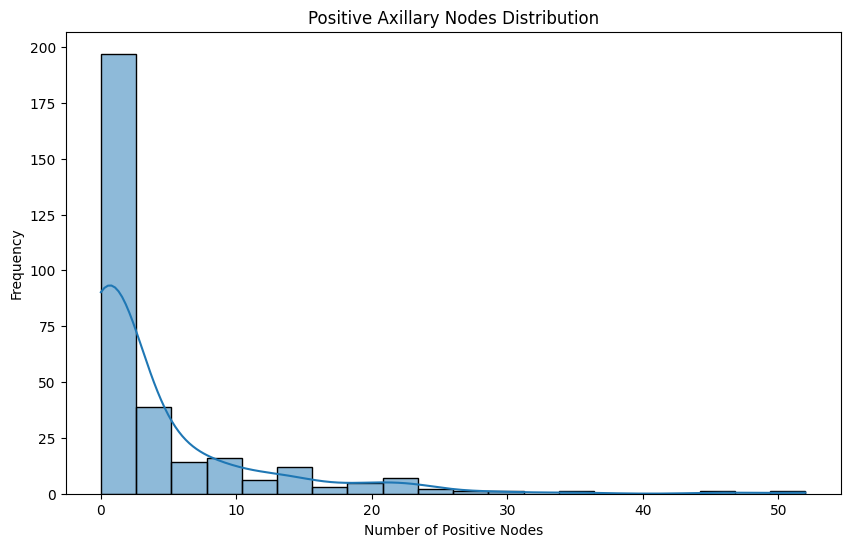

In [10]:
# Positive nodes distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["positive_nodes"], bins=20, kde=True)
plt.title("Positive Axillary Nodes Distribution")
plt.xlabel("Number of Positive Nodes")
plt.ylabel("Frequency")
plt.show()

Observation:

Most patients have a low number of positive axillary nodes.
The distribution is heavily skewed, with the majority of patients having less than 10 positive nodes.

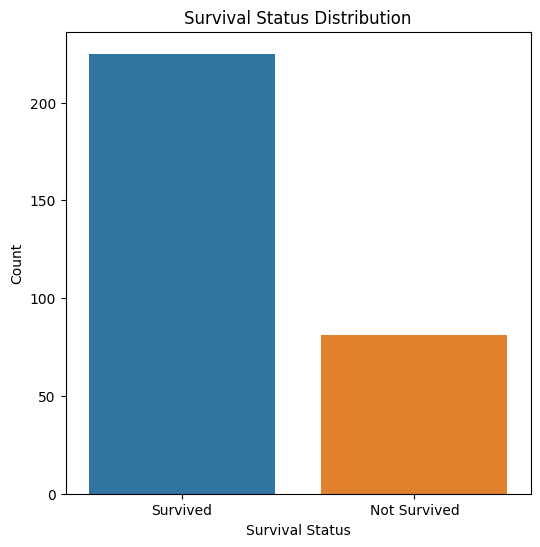

In [11]:
# Survival status distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x="survival_status")
plt.title("Survival Status Distribution")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Survived", "Not Survived"])
plt.show()

Observation:

The dataset is somewhat imbalanced, with more patients having survived for more than 5 years than those who did not.

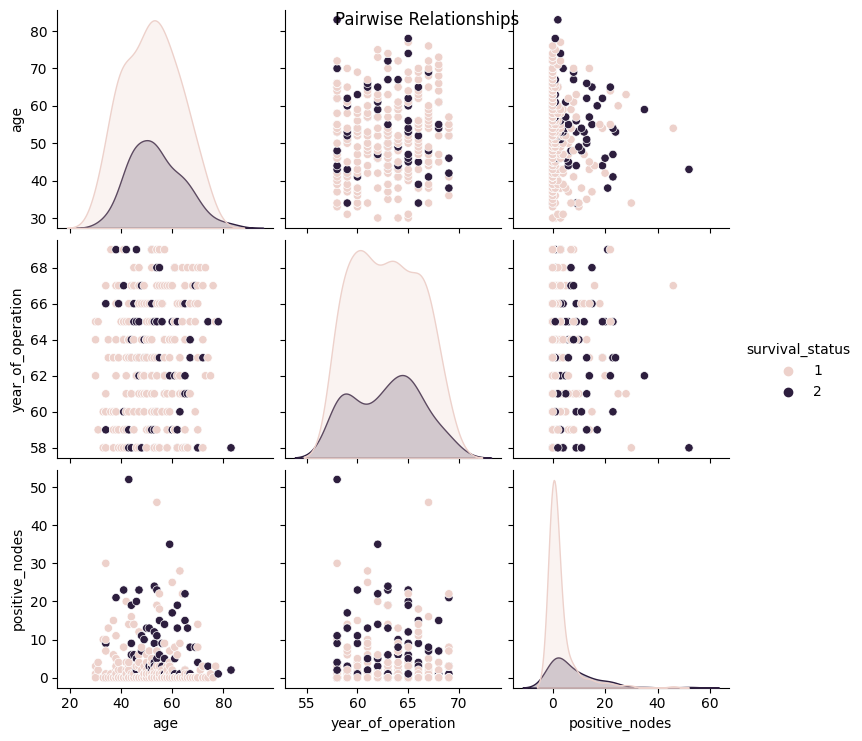

In [12]:
# Pairwise relationships
sns.pairplot(data, hue="survival_status", diag_kind="kde")
plt.suptitle("Pairwise Relationships")
plt.show()

Observation:

It's difficult to distinguish clear separation between survival classes based on pairwise scatter plots or kernel density estimates.

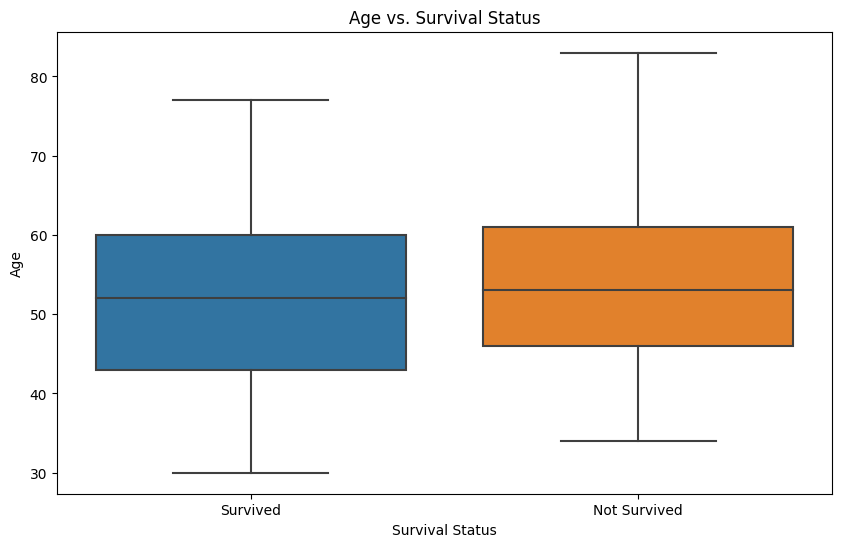

In [13]:
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="survival_status", y="age")
plt.title("Age vs. Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Age")
plt.xticks(ticks=[0, 1], labels=["Survived", "Not Survived"])
plt.show()

Observation:

The median age of patients who survived is slightly lower than those who did not survive.

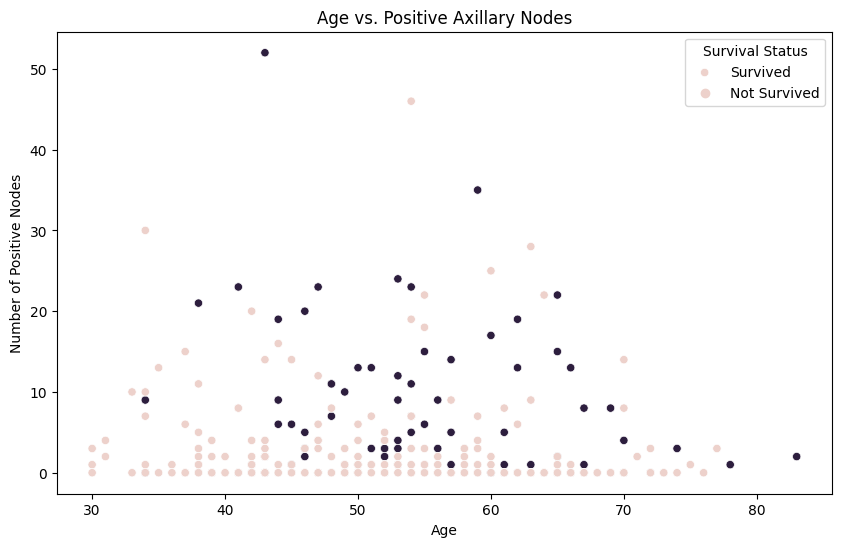

In [14]:
# Scatter plot: Age vs. Positive Nodes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="age", y="positive_nodes", hue="survival_status")
plt.title("Age vs. Positive Axillary Nodes")
plt.xlabel("Age")
plt.ylabel("Number of Positive Nodes")
plt.legend(title="Survival Status", labels=["Survived", "Not Survived"])
plt.show()

Observation:

There doesn't seem to be a strong linear relationship between age and the number of positive axillary nodes.
However, a higher number of positive nodes is associated with not surviving for 5 years.

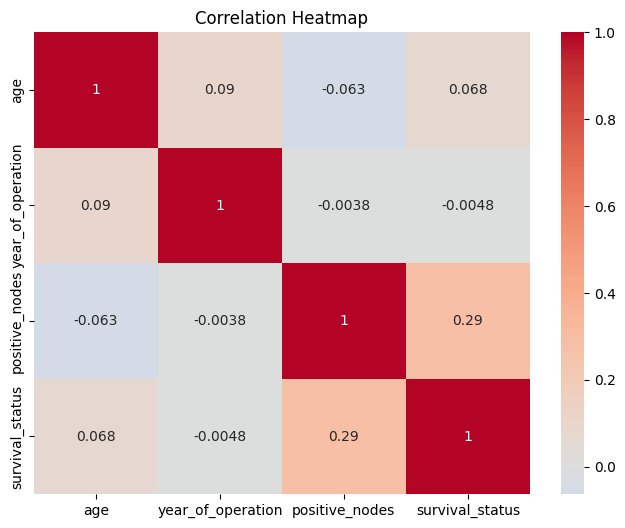

In [15]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

Observation:

None of the variables show a very strong correlation with each other.
This suggests that the variables might have independent effects on survival status.

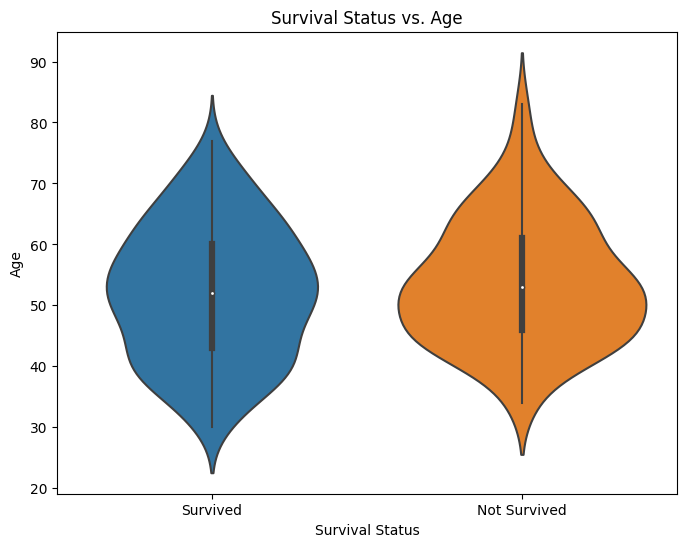

In [16]:
# Violin plot: Survival Status vs. Age
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x="survival_status", y="age")
plt.title("Survival Status vs. Age")
plt.xlabel("Survival Status")
plt.ylabel("Age")
plt.xticks(ticks=[0, 1], labels=["Survived", "Not Survived"])
plt.show()

Observation:

The age distribution for patients who survived and those who did not survive appears to be somewhat similar.
The distribution of ages for patients who did not survive seems slightly wider.

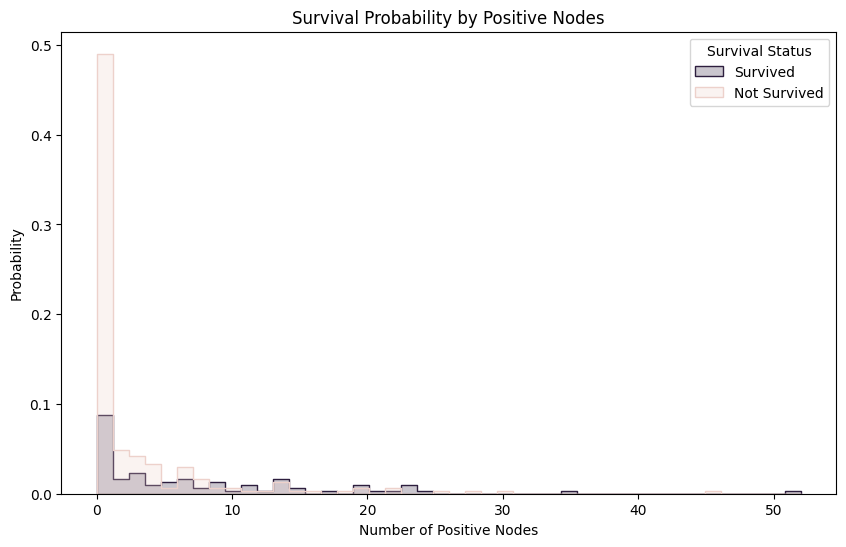

In [17]:
# Probability density function: Positive Nodes vs. Survival Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="positive_nodes", hue="survival_status", element="step", stat="probability")
plt.title("Survival Probability by Positive Nodes")
plt.xlabel("Number of Positive Nodes")
plt.ylabel("Probability")
plt.legend(title="Survival Status", labels=["Survived", "Not Survived"])
plt.show()

Observation:

Patients with fewer positive nodes tend to have a higher probability of survival.

In [18]:
# Statistical Test: Mann-Whitney U Test

# The Mann-Whitney U test can be performed to determine if there are statistically significant differences between the age distributions of patients who survived and those who did not.
from scipy.stats import mannwhitneyu

survived_age = data[data["survival_status"] == 1]["age"]
not_survived_age = data[data["survival_status"] == 2]["age"]

statistic, p_value = mannwhitneyu(survived_age, not_survived_age)
print("Mann-Whitney U Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U Test:
Statistic: 8446.0
P-value: 0.3291806398054865


Observation: The Mann-Whitney U test statistic is 8446.0, and the corresponding p-value is approximately 0.329. This p-value indicates that there is no strong evidence to reject the null hypothesis that the age distributions of patients who survived for more than 5 years and those who did not are significantly different. In other words, based on the p-value, there is no significant difference in the age distributions between the two survival groups in this dataset.

This means that, at a 0.05 significance level (commonly used), we don't have enough evidence to conclude that age significantly influences the survival outcome in this dataset.